<a href="https://colab.research.google.com/github/Dileepsingh6432/Retail-Sales-Prediction/blob/main/Rossman_Retail_Sales_Prediction_Dileep_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**  Dileep Singh
##### **Team Member 2 -**  Vishal Singh
##### **Team Member 3 -**  Mohd Irfan

# **Project Summary -**

Write the summary here within 500-600 words.
### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. And we are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
sales_data =pd.read_csv("/content/drive/MyDrive/Copy of Rossmann Stores Data.csv")

store_data=pd.read_csv("/content/drive/MyDrive/Copy of store.csv")


In [ ]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df=sales_data.merge(store_data, how='outer', on='Store') #Merge Both dataframes

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
df.shape

(1017209, 18)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 1017209
The number of columns in data is 18


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


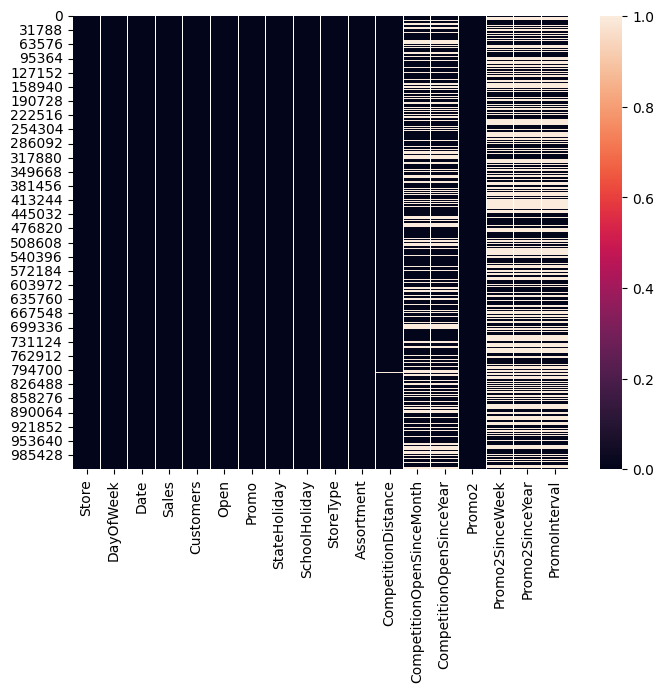

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=True) 

### What did you know about your dataset?

The given dataset is a dataset from Rossmen industry who operates over 3,000 drug stores in 7 European countries, and we have to analysis the sales of the stores and whatbare the factores affecting the sales. 
in our given dataset has 1017209 rows and 18 columnn and There are some missing values and there is no duplicate values in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

In [ ]:
# Dataset Describe
df.describe()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',df[col].unique())

The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column DayOfWeek are [5 4 3 2 1 7 6]
The unique values in column Customers are [ 555  546  523 ... 3727 4022 4106]
The unique values in column Open are [1 0]
The unique values in column Promo are [1 0]
The unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0]
The unique values in column SchoolHoliday are [1 0]
The unique values in column StoreType are ['c' 'a' 'd' 'b']
The unique values in column Assortment are ['a' 'c' 'b']
The unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
The unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
The unique values in column Promo2 are [0 1]
The unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39.

In [ ]:
df.Promo2.unique()

array([0, 1])

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
print(df['StateHoliday'].unique())
print(" ")
# Getting Unique StateHoliday Count
print("Unique StateHoliday Count is ",df['StateHoliday'].nunique())

['0' 'a' 'b' 'c' 0]
 
Unique StateHoliday Count is  5


In the above output, 'StateHoliday' contains two types of zeros. One is object type and other one is int type. So, we need to change the dtype of zero which is in incorrect data type. 

In [ ]:
# In StateHloday column, there is a string "0" so, convert it into int type
df['StateHoliday'].replace({'0':0}, inplace=True)


In [ ]:
df.StateHoliday.unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [ ]:
print(df['PromoInterval'].unique())
print(" ")
# Getting Unique PromoInterval Count
print("Unique StateHoliday Count is ",df['PromoInterval'].nunique())

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
 
Unique StateHoliday Count is  3


In [ ]:
# Getting Unique Store types
print(df['StoreType'].unique())
print(" ")
# Getting Unique States Count
print("Unique States Count is ",df['StoreType'].nunique(),".")

['c' 'a' 'd' 'b']
 
Unique States Count is  4 .


In [ ]:
# assigning as a categorical variables
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
# Convert the 'Date' column to a datetime data type, specifying the date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract the year, month, and day from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

Hence, our dataframe contains object data type, so we converted it into datetime as shown above.

In [ ]:
#Here we are checking average sale of each type of store
print(df[df['StoreType'] == 'a']['Sales'].mean())
print(df[df['StoreType'] == 'b']['Sales'].mean())
print(df[df['StoreType'] == 'c']['Sales'].mean())
print(df[df['StoreType'] == 'd']['Sales'].mean())

5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


In [ ]:
#Counts of Store of Each Type
df.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
#Extracting day from date and time
df["Day"] = df['Date'].dt.day_name()

In [ ]:
#Extracting Months from date and time
df["Months"] = df["Date"].dt.month_name()

In [ ]:
#checking sale on weekend
weekend_sale = df.groupby(['StoreType','Day'])['Sales'].mean().reset_index()
weekend_sale.rename(columns={'Sales': 'Mean Sales on Day'}, inplace=True)
weekend_sale

,StoreType,Day,Mean Sales on Day
0,a,Friday,6648.808335
1,a,Monday,7924.611934
2,a,Saturday,5335.876841
3,a,Sunday,40.814943
4,a,Thursday,6313.106618
5,a,Tuesday,7212.646675
6,a,Wednesday,6664.173464
7,b,Friday,10529.217717
8,b,Monday,10873.392540
9,b,Saturday,7879.622114


In [ ]:
#checking Sale on each months try to find sale on summer vocation
monthly_sale = df.groupby(['Months'])['Sales'].mean().sort_values()
monthly_sale

Months
January      5465.395529
May          5489.639973
October      5537.037419
September    5570.246033
February     5645.253150
August       5693.016554
April        5738.866916
June         5760.964375
March        5784.578871
November     6008.111821
July         6064.915711
December     6826.611377
Name: Sales, dtype: float64

In [ ]:
df.drop(['Months','Day'], axis=1, inplace=True)

In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type.rename(columns={'Sales': 'Total Sale'}, inplace=True)
store_type.rename(columns={'Customers': 'Total Customers'}, inplace=True)
store_type

,StoreType,Total Sale,Total Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


In [ ]:
store_open = df.groupby("StoreType")["Open","StateHoliday","SchoolHoliday"].sum().reset_index()
store_open

,StoreType,Open,SchoolHoliday
0,a,457077,98413
1,b,15563,2916
2,c,112978,24653
3,d,258774,55739


In [ ]:
store_assortment = df.groupby(['StoreType'])['Promo','Promo2'].count().reset_index()
store_assortment 

,StoreType,Promo,Promo2
0,a,551627,551627
1,b,15830,15830
2,c,136840,136840
3,d,312912,312912


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [ ]:
sales_in_each_assortemt =df.groupby(['StoreType','Assortment'])['Sales'].sum().reset_index()
sales_in_each_assortemt

,StoreType,Assortment,Sales
0,a,a,1870105131
1,a,c,1295229728
2,b,a,71357761
3,b,b,70946312
4,b,c,16927322
5,c,a,400260421
6,c,c,382961005
7,d,a,604026757
8,d,c,1161366186


In [ ]:
#just looking at the daily sales numbers over time.
sales_date = df.groupby(by='Date').agg({'Sales': 'sum'}).reset_index()
sales_date

,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


In [ ]:
df.PromoInterval.values

array([nan, nan, nan, ..., 'Mar,Jun,Sept,Dec', 'Mar,Jun,Sept,Dec',
       'Mar,Jun,Sept,Dec'], dtype=object)

In [ ]:
#here obtaining average sales over months and years.
df.groupby(['year','month'])['Sales'].mean()


year  month
2013  1        5211.555578
      2        5494.371397
      3        5820.349168
      4        5483.749836
      5        5364.127383
      6        5402.162960
      7        6042.062260
      8        5729.574049
      9        5322.988430
      10       5429.258788
      11       5864.601614
      12       6703.618140
2014  1        5431.875799
      2        5731.091512
      3        5584.257312
      4        5815.993333
      5        5632.670534
      6        5681.526188
      7        5999.403381
      8        5649.421252
      9        5865.104029
      10       5665.564878
      11       6179.249661
      12       6973.282456
2015  1        5752.747866
      2        5710.296541
      3        5949.130132
      4        5916.857578
      5        5472.122002
      6        6199.203976
      7        6142.705511
Name: Sales, dtype: float64

In [ ]:
# here exploring store types along with assortment , state holiday and avg sales
df.groupby(['StoreType','Assortment','StateHoliday'])['Sales'].mean()

StoreType  Assortment  StateHoliday
a          a           0                5568.329797
                       a                  99.287144
                       b                   0.000000
                       c                   0.000000
           c           0                6498.024887
                       a                 149.526042
                       b                  76.975113
                       c                  19.907277
b          a           0               10796.756580
                       a               11918.106796
                       b               12901.809524
                       c                9369.500000
           b           0                8465.878626
                       a               11276.294798
                       b               11846.740741
                       c               10276.058824
           c           0               17958.629630
                       a               18410.142857
                       b    

### What all manipulations have you done and insights you found?

here we explored the data and looked at all variables and we tried to make a  relationship with sales and we found that
we have four types of stores in which we found that the maximum number of stores is type-a and the least is of type B. In trying to further investigate that difference between average sales of the each stores And in this we found that store Type B average sales are the most, Although its stores are the least.
then we checked further and found that sales of store type a are the most among all then  we looked at customers by Store Type and found Type a to be well ahead of the others. This suggests that Type a stores on  have more customers visit.

We were a little curious as to why the sales of Store A are so high ?


Then we investigated it further and found that type a stores are the most and they have more customers
When looking at store Assortment we found that stores types B has lowest Assortment and store type A has highest assortments and also type B assortments represent a small share of total sales

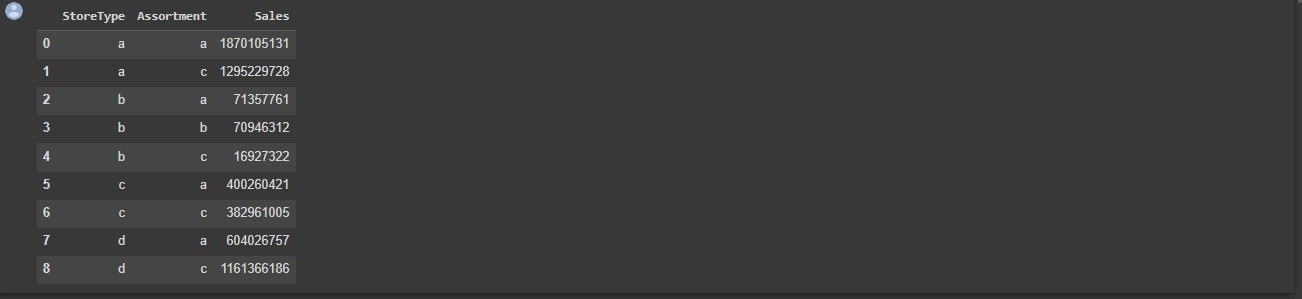


After that we tried to find pattern of sale on daily basis over the year that how sale varries over the year but we didnt find any specific pattern.Sale were almost the same throughout the year 
as we see in below graph.


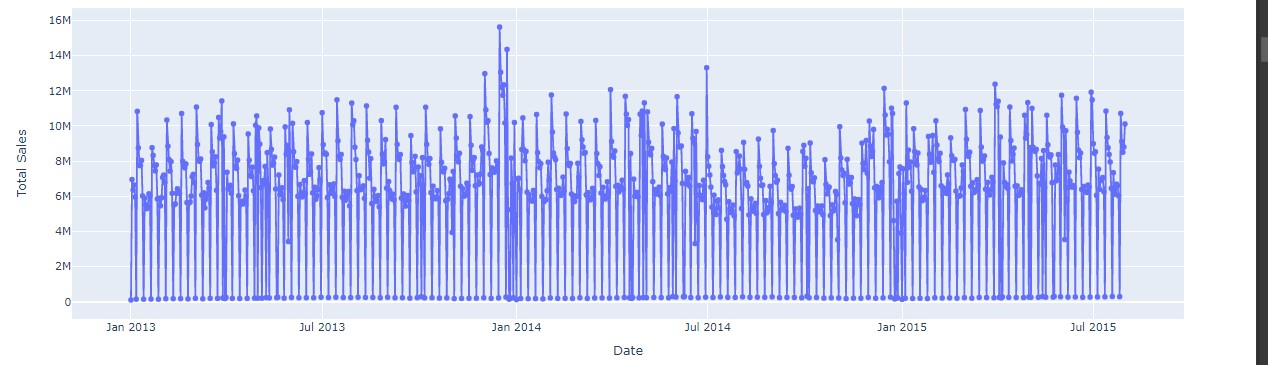


We have seen above that Store type B average sale was the maximum lets find out why?

We thought let's find out if some stores are open on the holiday as well or not?

Then we came to know that Type B stores are almost open even on holidays. And among the rest of the different types of stores, there are very few stors among them that remain open on holidays.
And type B store remain open on weekend also.

Then we checked the monthly sale ,in which we found that the sale is more in december month, which means that the sale is more on summer vocation.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Chart on Independant Variable i.e., Assortment (Univariate)

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
 


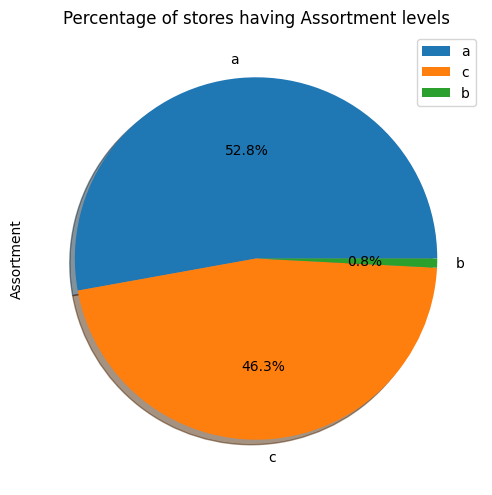

In [ ]:
# Chart - 1 visualization code
# Indepnedent Column (Assorment) Value Counts
print(df.Assortment.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Assortment'].value_counts().plot.pie(title='Percentage of stores having Assortment levels', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

We pick the pie chart because this chart break the whole data into parts to make event the most complex data simpler to grasp.It divided the data into many parts of slices.It best represent the categorical features.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that from the whole data that:

1.   52.8 % stores have a:basic type assortment strategy
2.   46.3 % stores have c:Extented type assortment strategy
3.   0.8 % stores have  b:Extra type assortment strategy.
Here we can see that maximum number of stores have basic or Extended type assortment strategy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

An Assortment strategy in retailing involves the number and type of products that store display for purchase by consumers.The assortment level or strategy of **a : Basic** or **c : Extended** have positive growth because the most of stores applying these strategies and have positive growth in sales.
While **b : Extra** type store have negative growth in sales.Therefore most type of stores not going for **'c'** type assortment Strategy.

#### Chart - 2 Count plot on Independent variable i.e.., StoreType (Univariate)

In [ ]:
# Chart - 3 visualization code
# Defining  a Function to make plot in percentage.
def with_percent (plot , feature):
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() -.01, i.get_height() + 0.5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

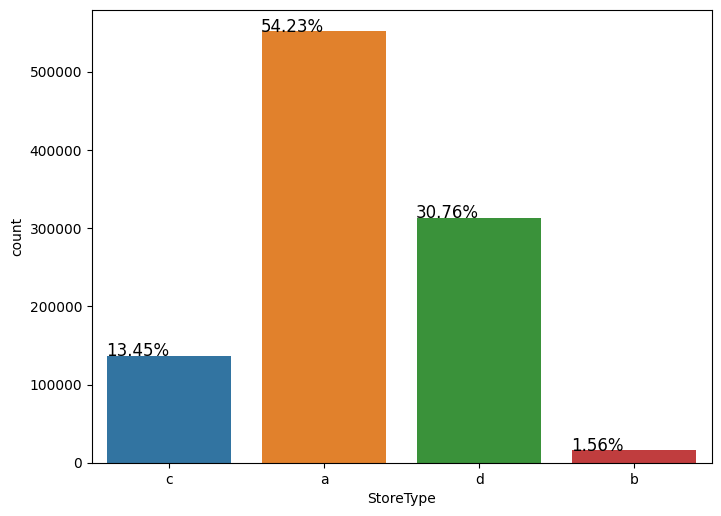

In [ ]:
# Count plot.
ax=sns.countplot(df1['StoreType'])
with_percent(ax, df1['StoreType'])
plt.show()


##### 1. Why did you pick the specific chart?

We use countplot because it is used to represent the occurrence (counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Here we have count the type of stores of each categories in the given data:


1.   54.23 % of Type : **'a'** Store model
2.   30.76 % of Type : **'d'** Store model
3.   13.45 % of Type : **'c'** Store model
4.   1.56  % of Type : **'b'** Store model

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the data stores are divided into 4 different types.Here we can see that maximum number of stores of Type **a** is present.Here in this analysis we cannot predict the growth of sales but in further analysis we will see that growth of sales.

#### Chart - 3 Pie Plot to check Percentage of stores open or close (Univariate) or doing sales.

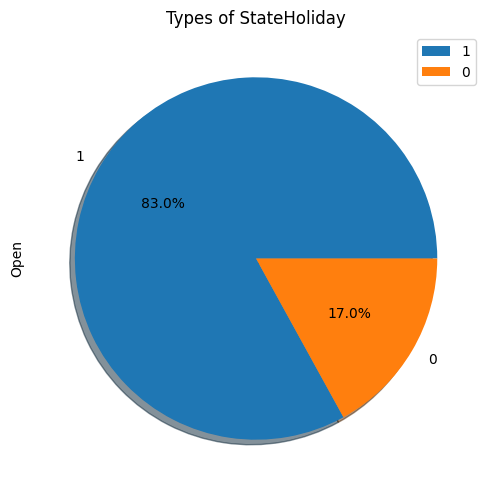

In [ ]:
# Chart - 2 visualization code
df['Open'].value_counts().plot.pie(title='Types of StateHoliday', legend=True, autopct='%1.1f%%', shadow=True)


##### 1. Why did you pick the specific chart?

Here we pick a pie chart because pie chart is a circular graph that displays data that is measured in one variable. It breaks out the data into categories, with each category in one sector of the chart. Here it gives a good idea to labelthe percentage of stores open or close in the given data.

##### 2. What is/are the insight(s) found from the chart?

**1**-*Stores are Open*

**0**-*Stores are Closed*

Here we can see that 83 % of stores are open and doing sales while 17 % of stores remain cloed due to some state holiday or School holiday or some stores in the dataset were temporarily closed for refurbishment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The **Open** feature in dataset represents which stores are open or closed.
Here we can see that 83 % of stores are open and doing sales which leads to positive business impact because more than 80% of stores of Rossmann operates.
While 17 % of stores remain cloed due to some state holiday or School holiday or some stores in the dataset were temporarily closed for refurbishment which may decrease the sales of Rossmann drug stores.In the further analysis we will see how the other features affecting the Rossmann sales.

#### Chart - 4 Bar Plot of various categorical variable the basis of Sales (Bivariate)

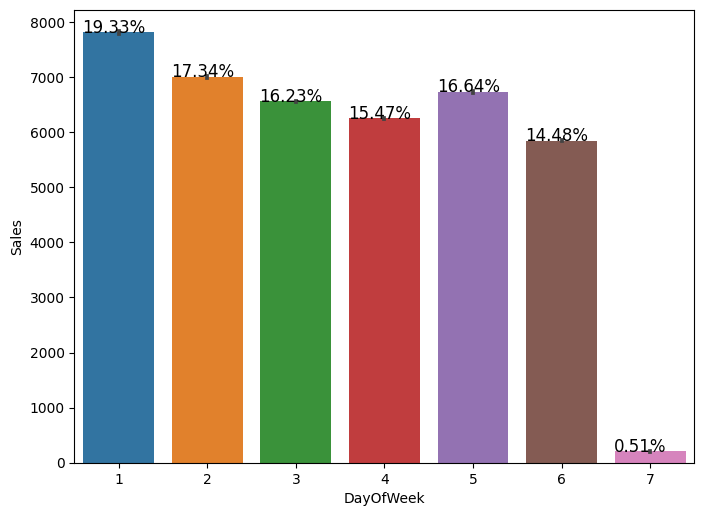

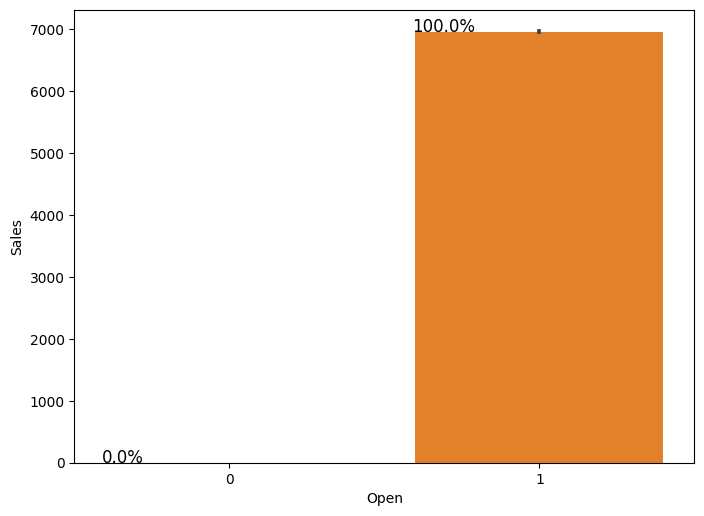

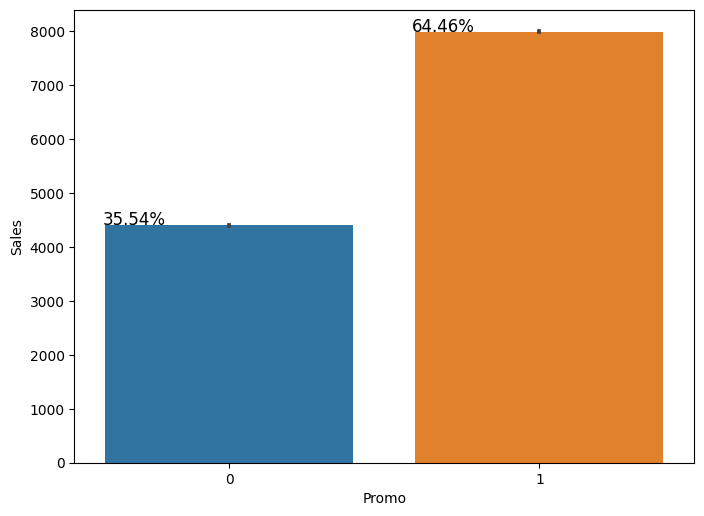

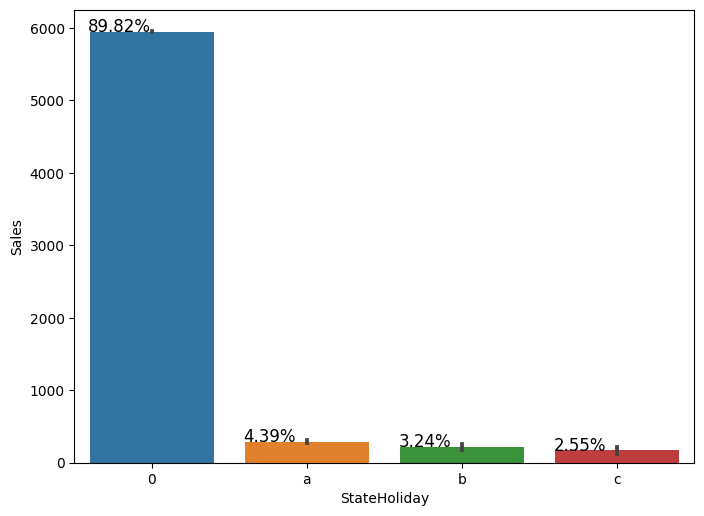

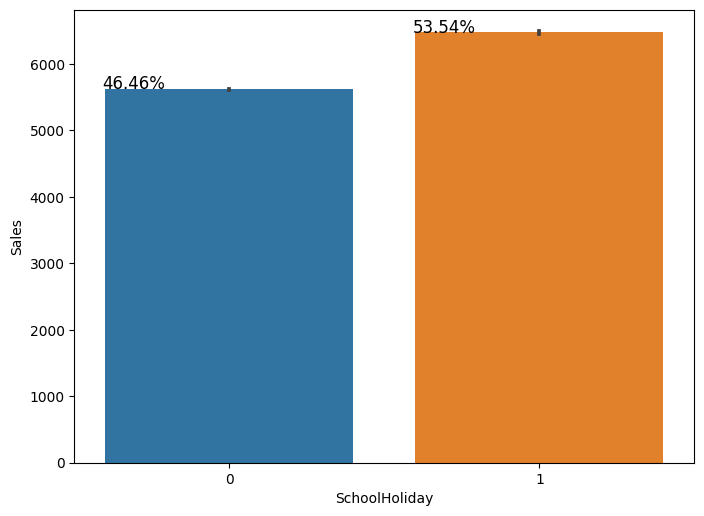

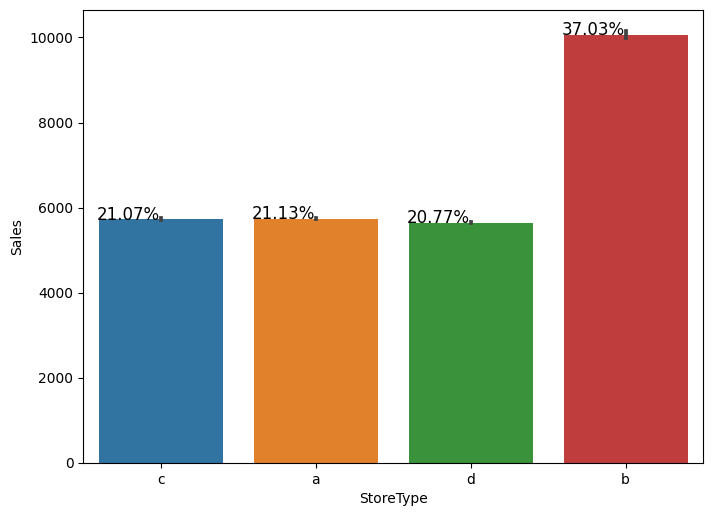

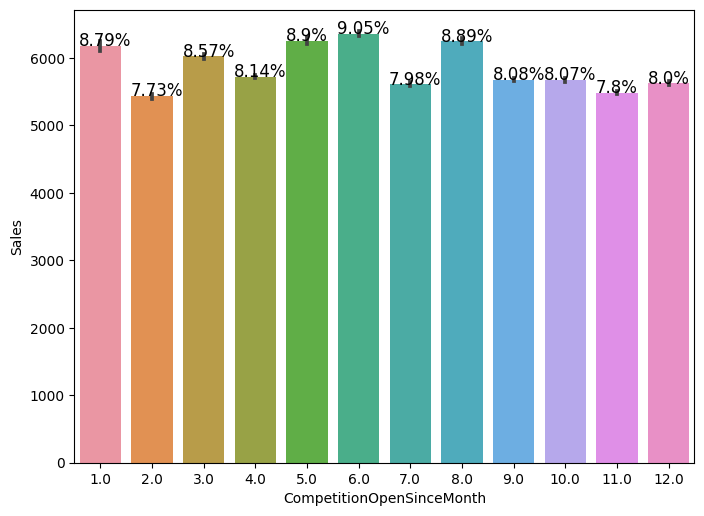

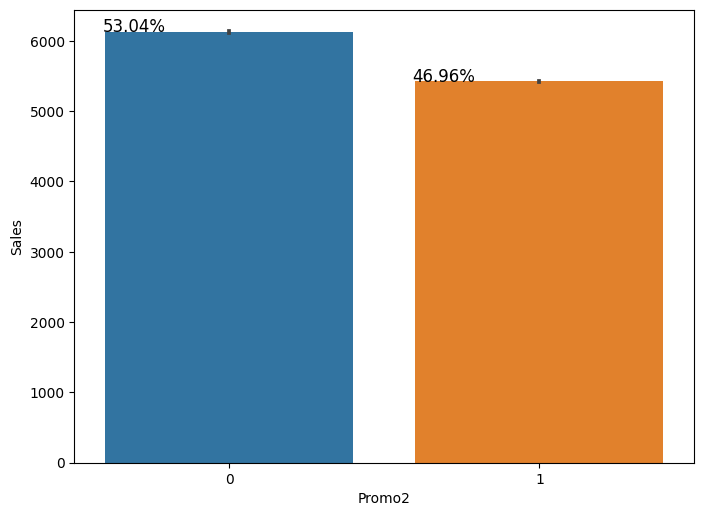

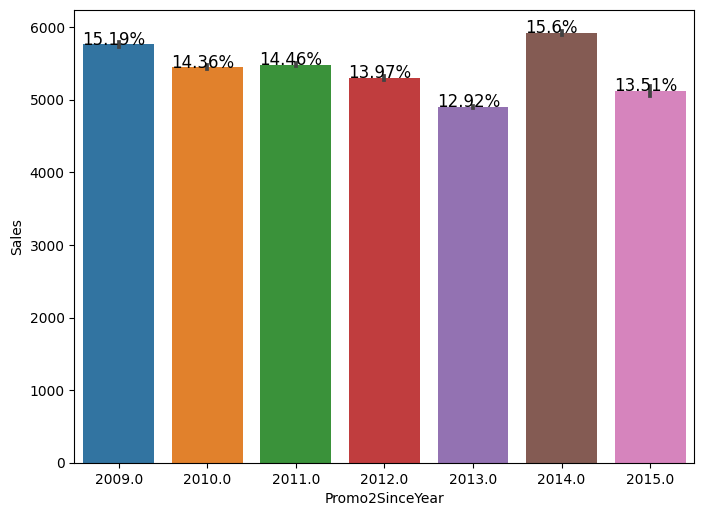

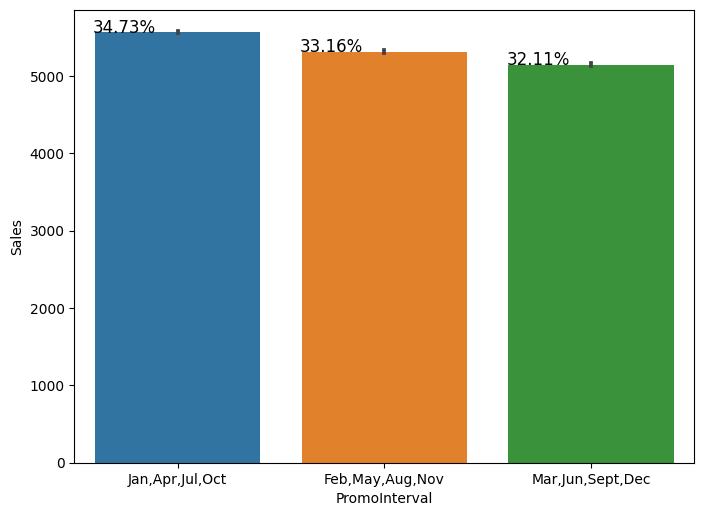

In [ ]:
# Chart - 4 visualization code
# Here we are making a list of various categorical variables.
independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for var in independent_variables:
  ax = sns.barplot(x=df[var], y=df['Sales'])
  #now here trying to show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()


##### 1. Why did you pick the specific chart?




Here we have used bar plot because Bar graphs are  helpful for comparing the classes or groups of data and gives exact value.Here we are compairing various various categorical data with our target variable (Sales) i.e. how each categorical variable affecting Sales of Rossmann Stores.

##### 2. What is/are the insight(s) found from the chart?

Here we have compared different catgorical variable lets see the insights that we got from the above plots:

1. **Day of Week Vs Sales**

Here we can see that there more sales on Monday (19.3 %) and Less sales on Sunday(0.51 %).It means that various stores are closed on Sunday due to which its sales are decreased.

2. **Promo Vs Sales**

The shops which are going for promo or giving discount  have more sales around 64.46 % of total sales as compare to Stores which are not going for promo or discount offers are doing only 35.54 % of total sales.

3. **State Holiday Vs Sales**

Here:
*   0 : No holiday
*   a : Public holiday
*   b : Easter holiday
*   c : Christmas
We can see that very less sales occuring on christmas(2.55 %).It means that there are very less stors operate on Christmas day therefore it is doing less sales on that day.

4. **School Holiday Vs Sales**

*   0 : No School Holiday
*   1 : School Holiday

Here we can see that due to school holiday the sales are decreased by 46.46 %.It means school holidays drastically affecting the Sales.
By compairing School holiday plot with state holiday we can see that there are more sales on school holiday as compare to state holiday because more stores are open on school holiday.

5.  **StoreType Vs Sales**

There are four different types of store are available in Rossmann stores:
*   a
*   b
*   c
*   d

Here we have compared the average percentage of Sales of each store type we have founded that Average percentage of Sales  Type **"a"** storeis maximum around 37.03 % as compare to other stores while other stores are doing almost equal average percentage of sales.

6. **CompetitionOpthenSinceMonth Vs Sales**

As we can see that from plot in the month of **June** sales are high it means that are less competitiors stores open in this month.Becasue as competitors increased of particular of particular store then sales starts decreasing of particular store. 

7. **Promo 2 Vs Sales**

The shops which are going for promo2 or giving discount  have sales around 46.96 % of total sales as compare to Stores which are not going for promo or discount offers are having 53.04 % of total sales.It means that the stores which are opting promo 2 is experiencing very less number of sales.It leads to negative growth of sales. 

8. **CompetitionOpthenSinceYear Vs Sales**

As we can see that from plot in the year of **2014** sales are high it means that are less competitiors stores open in this Year.Becasue as competitors increased of particular of particular store then sales starts decreasing of particular store. 

9. **PromoInterval Vs Sales**

Promo Interval describes the consecutive intervals in Promo 2.There are 3 intervals:
1.   Jan,Apr,Jul,Oct
2.   Feb,May,Aug,Nov
3.   Mar,Jun,Sept,Dec

 Here 0 means no interval.
 The store which are not participating in any intervals have highest average sale as compare to others.

 The stores which are participating in promointerval we can see that the firts promo interval(Jan,Apr,Jul,Oct) have highest average sales as compare to other promo intervals.
 







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. On monday sales are getting high so the the strores can prepare the stock on the basis of sales of Day of week so that stores does not run out of stock.Therefore it is helpul in creating the positive business impact.

2. If the stores goes for promo then it leads to positive growth of sales.

3. On Christmas there is negative growth in sales.
4. School holiday leads to negative growth in sales because on School holiday there is negative growth in sales. 
5. Store type **b** leads to positive growth in sales because number of stores of type b is less but it making high sales as compare to other store type.While Store type **a** leads to negative growth in sales because number of stores of type a is maximum but its average sales are lower.

6. The stores which are opting promo 2 is experiencing very less number of sales.It leads to negative growth of sales.This leads to negative business impact.

7. The stores in the year 2014 facing less competition as compare to other year therefore it leads to postivie growth of sales in Year 2014.Thus provide a positive business impact in year 2014.From year 2009 to 2013 Sales are decreasing it means competitiors ar increasing.
8. If promo 2 is running in the interval (Jan,Apr,Jul,Oct) have highest average sales as compare to other promo intervals.There fore it leads to positive growth in sales.

#### Chart - 5  Bar Plot of Assortment on the basis of Sales (Bivariate)

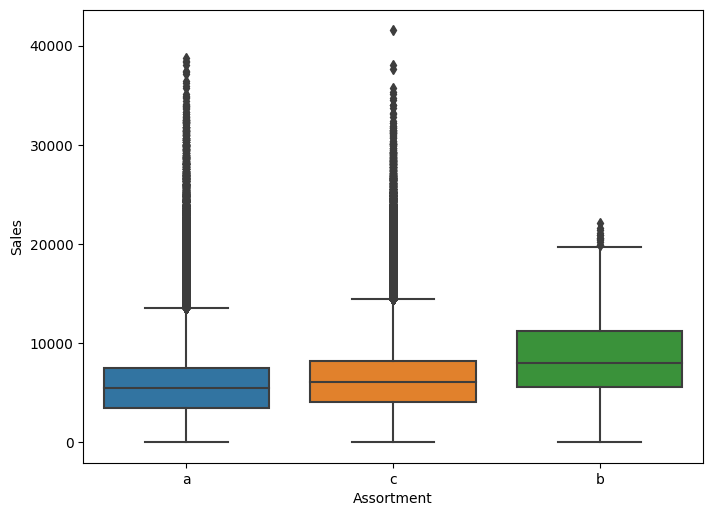

In [ ]:
# Chart - 5 visualization code
sns.boxplot(x=df['Assortment'],y=df['Sales'])
# Show the box plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a highly visually effective way of viewing a clear summary of one or more sets of data. It is particularly useful for quickly summarizing and comparing different sets of results from different experiments.Here we are using box plot so that we can easily comapare the sales of each assortment strategy by 5 point summary.The 5 point summary are:
1. Median Value
2. Lower Quartile(Q1)
3. Upper Quartile(Q3)
4. Highest Value
5. Lowest value

##### 2. What is/are the insight(s) found from the chart?

By seeing the above plot we can see that:

1.Median Value

The median sales is highest in **b** type assortmment.

2.Highest value

The highest sale is occur in **c** type assortment.

The maximum number of sales of various types of assortment levels lie below 10000 sales. 
As we can also see that the maximum number of outliers are present **a** and **c** type assortment strategies sales. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.Here by seeing the above plot the retailer gets an idea which types of assortment stategies should he follow so that he can get postitive growth in his sales.If Retailer follow **b:Extra** type strategy then it leads to more positive growth in Sales.

#### Chart - 6 Scatter plot of Sales and competition distance on the basis of Store Type (Multivariate)

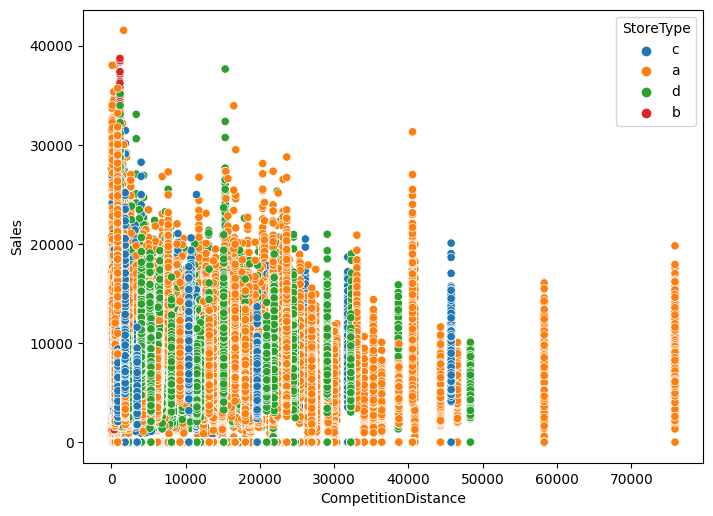

In [ ]:
# Chart - 6 visualization code
x = df['Sales']
y = df['CompetitionDistance']
sns.scatterplot(y,x,hue=df['StoreType'])


##### 1. Why did you pick the specific chart?

Here we have used scatter plot because it is a useful tool for deriving the correlation between two variables.Here we are deriving correlation between sales and competition distance.  

##### 2. What is/are the insight(s) found from the chart?

Here we can se that when competition distances are less means when Stores are closer to each other then Sales are maximum.It may happen due to as stores are closer then there is decrease in the price of product due to competition between stores which leads to attract more customers and due to which there is increase in sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the above plot helps to create positive business impact because Rossmann managers get knowledge how the distance between stores affecting the sales of stores.

#### Chart- 7 Lines Maker Plot of Date on the basis of sales (Bivariate)

In [ ]:
# Chart - 7 Visualization code
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_date['Date'], y=sales_date['Sales'],
                    mode='lines+markers',
                    name='actual'))
fig.update_layout(title='Sales over Time',
                   xaxis_title='Date',
                   yaxis_title='Total Sales')
fig.show()

##### 1. Why did you pick the specific chart?

Here we have used lines maker plot because it give best representation of sales at each date just by clicking the mouse arrow.

##### 2. What is/are the insight(s) found from the chart?

By seeing the above plot we can see that the highest sale is going on December 16,2013 is 15.62 million.While most of sales are below 300K.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this graph leads to positive business impact because it gives the clear picture to Rossmann manager how the sales are varying on each date,month and year.So on the basis of that he can take certain decisions to increase his sales.

#### Chart - 8 Stacked Bar Plot of store type and promo data on the basis of sales (Multivariate)

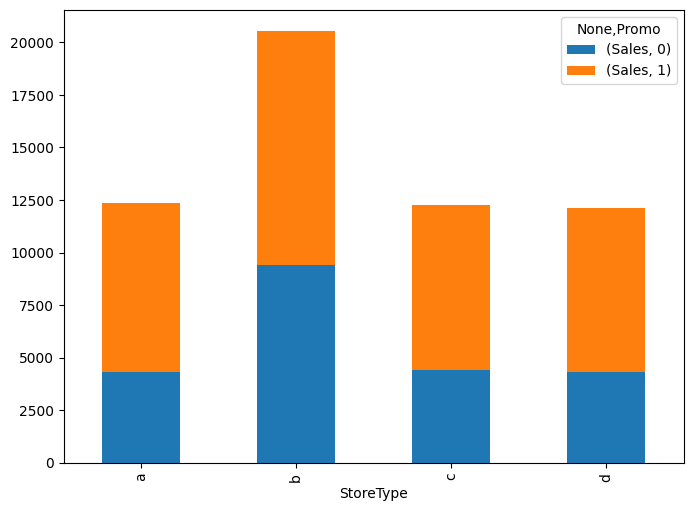

In [ ]:
# Chart - 8 visualization code
# Here we are applying group by operation.
df_plot=df.groupby(['Promo','StoreType'])['Sales'].mean().reset_index()
x=df_plot.pivot(columns='Promo', index='StoreType')
x.plot(kind='bar', stacked=True)

##### 1. Why did you pick the specific chart?

Here we have used stacked bar plot because this plot is very helpful in comparison between two or more quantities.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that there is very high impact of promo on store type **a,c and d** becaues the stores going for promo have high sales as compare to the stores are not going for promo except store type **b** because in **b- type** stores there is not much increment in sales as compare to other stores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights helpful in creating a positive business imapact because the Rossmann manager by seeing the above plot will get an idea how the promo is affecting the sales of each store type.So on the basis of that he can decide which store type must go for promo in future so that there is increment in sales.

#### Chart - 9 Bar plot showing the average sales of each store type on applying different Assortment strategies.(Multivariate)

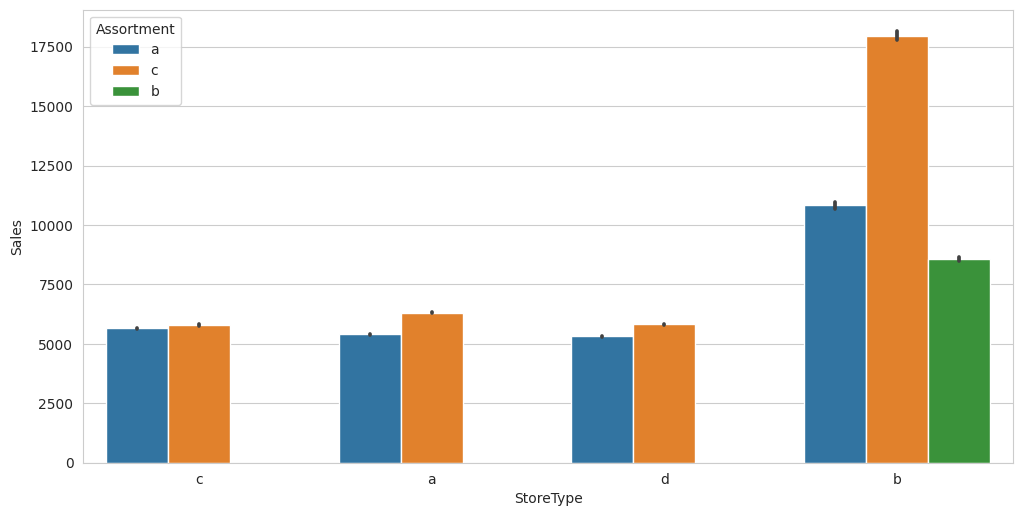

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
ax=sns.barplot(x=df['StoreType'], y=df['Sales'],hue=df['Assortment'])
plt.show()


##### 1. Why did you pick the specific chart?

Here we using sub bar plot so that we can easily compare between different categorical features.Here we are compairing the average sales of each store type on thev basis of assortment levels or strategies.

##### 2. What is/are the insight(s) found from the chart?

Here by seeing the above plot we can see that:


1.   The store type     ***a,c,d***  having assortment strategies ***a and c*** while store type **b** having assortment strategies **a,b,c**
2.   The stores  which following **c** assortment strategy have high sales as compare to other assortment strategy.







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights are helpful in creating a positive business impact because from the above plot Rossmann stores manager will get information which assortment strategy is better for particular type of store so that stores can do maximum sales.

In [ ]:
# Chart - 11 visualization code

#### Chart - 10 Multiple Line plot Showing Monthly Sales over years.(Multivariate)

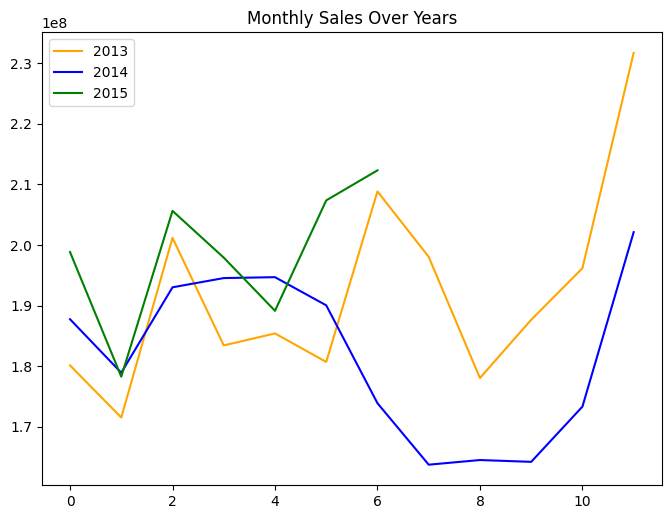

In [ ]:
# Chart - 10 visualization code
sales_data_for_2013= df[df['year']== 2013].groupby('month')['Sales'].sum().reset_index()
sales_data_for_2014 = df[df['year']==2014].groupby('month')['Sales'].sum().reset_index()
sales_data_for_2015 = df[df['year']==2015].groupby('month')['Sales'].sum().reset_index()
plt.plot(sales_data_for_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_data_for_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_data_for_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()


##### 1. Why did you pick the specific chart?

Here we have used multiple line plot because  It's used to display the changes in two or more variables over the same time span. 

##### 2. What is/are the insight(s) found from the chart?

Here by seeing the above plot we can see that how the sales are varying over the years.


1. In 2015 we have sales only for 6 months while in 2014 and 2013 we sales for 12 months.
2. In the month of January,2015 the sales are going down drastically as compare to other years of same month but its total sales are highest as compare to other year 2013 and 2014.
3. In the month of February the sales of year 2013 and 2015 increasing drastically as compare to 2014 sales.But total sales in 2015 is greater then sales of other year.
4. In the 8th month(August) and 9 th month(September) have minimum sales in the year 2014 as compare to 2013 sales.
5. In 2013 the minimum sale is 170M  in the month of January and maximum sale is 230M in the month of December.
6. In 2014 the minimum sale is 85M in the month of August and September while maximum sale is 200M in the month of December.
7. As we can see that the sales are increasing drastically in the month of December of every year.
8. As we compare the sales of 2013 with 2014 there is huge randomness of sales in the year 2013 and follows a **V-shaped** recovery.(A V-shaped recovery is characterized by a quick and sustained recovery in measures of economic performance after a sharp economic decline.) while sales in 2014 varies like **Sinusoidal wave.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights helpful in positive business impact because by seeing the above plot the Rossmann store manager able to manage the stock of drugs on each month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1- Our given Sales data is normally distributed.

2- Average sale of 2013 is equal to average sales of 2014

3- 

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: **N**o = normally distributed

Alternate Hypothesis : **N**a = not normally distributed

Test Type: Normality test using Shapiro-Wilk Test 


#### 2. Perform an appropriate statistical test.

In [ ]:
df_hyp = df.copy()

In [ ]:
# Perform Statistical Test to obtain P-Value
#Help from Python
from scipy.stats import shapiro

DataToTest = df_hyp["Sales"].sample(n=50000)

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.94, p=0.000000000000000000000000000000
Not a normal distribution


##### Which statistical test have you done to obtain P-Value?

Normality test using Shapiro-Wilk Test : tests If data is normally distributed

##### Why did you choose the specific statistical test?

The Shapiro–Wilk test is a test of normality in frequentist statistics
 value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

 he Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality

If you need to use skewness and kurtosis values to determine normality, rather the Shapiro-Wilk test, you will find these in our enhanced testing for normality guide. 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: **N**o = 5658 -mean sale of both year 2013 & 2014 is equal

Alternate Hypothesis : **N**a > 5658 -mean sale of 2014 is greater than last year

Test Type: Independent Sample T-test


#### 2. Perform an appropriate statistical test.

In [ ]:
#lets extract sale of each year
yearly_sale = df_hyp.groupby(['year'])['Sales'].mean()
yearly_sale

year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

In [ ]:
df3 = df_hyp[df_hyp['year']==2014].sample(n=50000)
df4 = df_hyp[df_hyp['year']==2013].sample(n=50000)
df31 = df3["Sales"].sample(n=50000)
df41 = df4["Sales"].sample(n=50000)

In [ ]:
#assumption- mean sale of both sample is equal 
#Ho = avg sale of bi=oth equal
# Ha = sale will be greater than last year 
stat, p = scipy.stats.ttest_ind(df41,df31)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
  print("we failled to reject null hypothesis")
else:
  print("we reject the null hypothesis")

stat=-6.66, p=0.000000000026875672697371017933
we reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

we used Independent Sample T-test to obtained P-value  this test used to compare means of two sample. we imported ttest library from scipy to perform this test.

here p value is less than 0.05 so we rejected the null hypothesis so our assumptionj becomes true that average sale of 2014 is greater than last year

##### Why did you choose the specific statistical test?

independent sample t test used to compare mean value of two sample whether there is statistical evidence that the associated population means are significantly different or same.
here we have sales of two years we know the mean of sales of both year so it is very easy to comare sales of both year thats why it becomes very easy to use independent sample t test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Find the null values present in the dataset.
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
WeekOfYear                        0
DayOfYear                         0
dtype: int64

Hence, the 'CompetitionDistance' is a numerical column so, we check for the skewness of the data before treating null values.


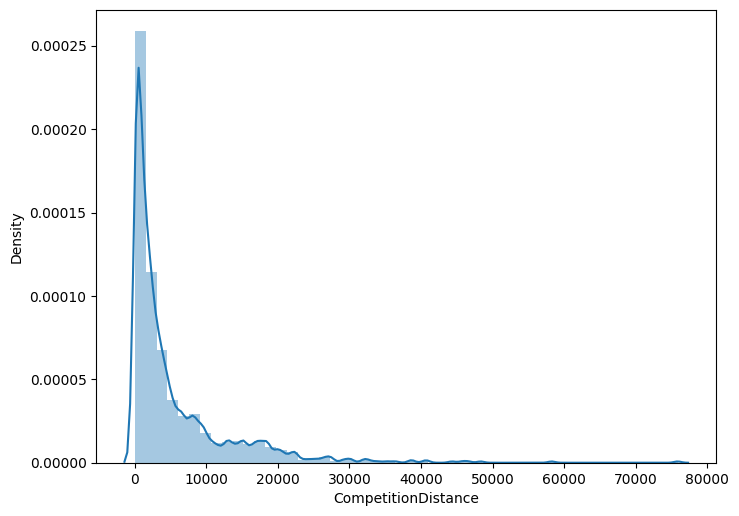

In [ ]:
# sns.displot(store_data['CompetitionDistance']) # Check the distribution of 'CompetitionDistance' or its skewness
sns.distplot(df['CompetitionDistance'])


In [ ]:
df['CompetitionDistance'].skew()

2.9285340174784116

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True) # Replace the null value with median because it is skewed


Now, check the distrbution of "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

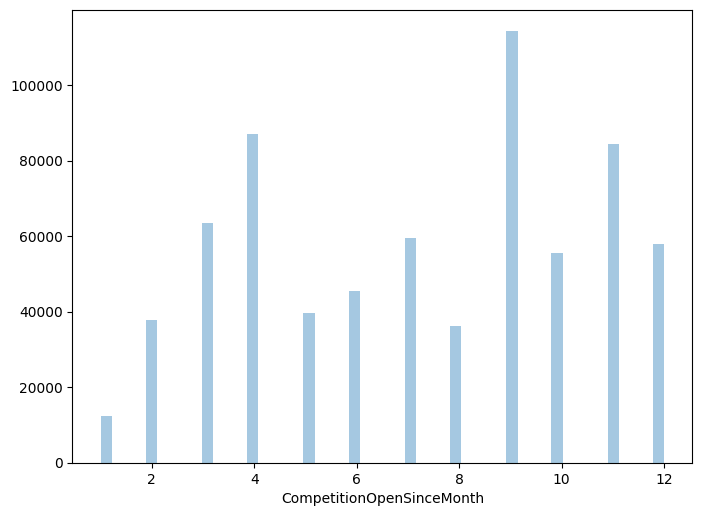

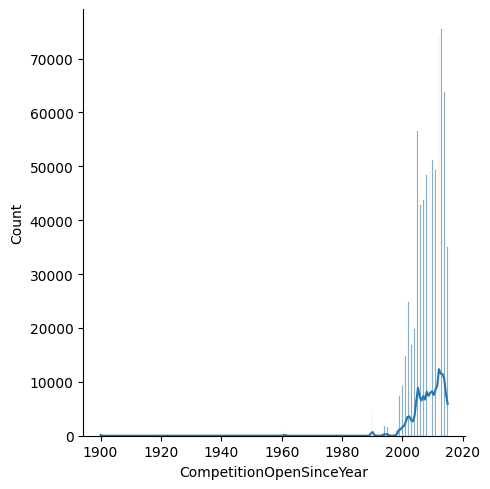

In [ ]:
sns.distplot(df['CompetitionOpenSinceMonth'],kde=False) #check the distribution of 'CompetitionOpenSinceMonth'
sns.displot(df['CompetitionOpenSinceYear'],kde=True) #check the distribution of 'CompetitionOpenSinceYear'

In [ ]:
# Hence 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' are categorical data so, replace the null values with mode
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
#Here, Promo2SinceWeek, Promo2SinceYear, PromoInterval are null so, replace nan value with 0
df['Promo2SinceWeek'].fillna(value=0,inplace=True)
df['Promo2SinceYear'].fillna(value=0,inplace=True)
df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### What all missing value imputation techniques have you used and why did you use those techniques?

'CompetitionDistance' shows an positive or right skewed data so, we replace the null values with the median because the median is not affected by the outliers.

'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical features so, we replaced the null values with the mode.

In 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' missing values represent that there are no promo2 (promo in consecutive month) in the particular date. So, we replace the null value with zero.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df['Sales'].min()

0

In [ ]:
df['Sales'].max()

41551

Total number of Outliers present in the Sales column are 9731.


[Text(0.5, 1.0, 'Outliers Distribution')]

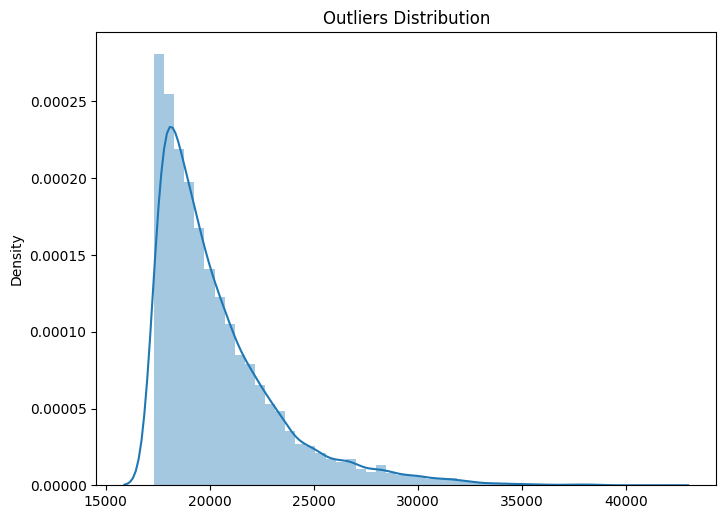

In [ ]:
#code to seperate outliers
mean = np.mean(df['Sales']) #mean
std = np.std(df['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df['Sales']:
    z_score = (value-mean)/std
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [ ]:
max(outliers)

41551

In [ ]:
min(outliers)

17325

In [ ]:
#percentage of sales greater than 10.2
sales_outliers = df.loc[df['Sales']> min(outliers)]
percentage_of_outliers = (len(sales_outliers)/len(df))*100
#print
print(f'The percentage of observations of sales greater than {min(outliers)} are {percentage_of_outliers}')

The percentage of observations of sales greater than 17325 are 0.9563423052686321


In [ ]:
df.loc[df['Sales']> min(outliers)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,WeekOfYear,DayOfYear
3404,4,1,2013-12-30,17412,2216,1,0,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2013,12,1,364
6244,7,1,2013-12-16,18413,1490,1,1,0,0,a,...,4.0,2013.0,0,0.0,0.0,0,2013,12,51,350
6384,7,1,2013-07-29,17567,1622,1,1,0,1,a,...,4.0,2013.0,0,0.0,0.0,0,2013,7,31,210
9648,11,1,2014-12-15,17724,1788,1,1,0,0,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2014,12,51,349
10005,11,1,2013-12-23,22822,2849,1,0,0,1,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,52,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-01-07,21237,2962,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,2,7
1016262,1114,6,2013-01-05,18856,3065,1,0,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,5
1016263,1114,5,2013-01-04,18371,3036,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,4
1016264,1114,4,2013-01-03,18463,3211,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,3


In [ ]:
#exploring the reasons behind this behaviour
sales_outliers.reset_index(drop=True)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,WeekOfYear,DayOfYear
0,4,1,2013-12-30,17412,2216,1,0,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2013,12,1,364
1,7,1,2013-12-16,18413,1490,1,1,0,0,a,...,4.0,2013.0,0,0.0,0.0,0,2013,12,51,350
2,7,1,2013-07-29,17567,1622,1,1,0,1,a,...,4.0,2013.0,0,0.0,0.0,0,2013,7,31,210
3,11,1,2014-12-15,17724,1788,1,1,0,0,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2014,12,51,349
4,11,1,2013-12-23,22822,2849,1,0,0,1,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,52,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,1114,1,2013-01-07,21237,2962,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,2,7
9724,1114,6,2013-01-05,18856,3065,1,0,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,5
9725,1114,5,2013-01-04,18371,3036,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,4
9726,1114,4,2013-01-03,18463,3211,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,3


In [ ]:
#lets see the sales when there is promo

sales_outliers[sales_outliers['Promo']==1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,WeekOfYear,DayOfYear
6244,7,1,2013-12-16,18413,1490,1,1,0,0,a,...,4.0,2013.0,0,0.0,0.0,0,2013,12,51,350
6384,7,1,2013-07-29,17567,1622,1,1,0,1,a,...,4.0,2013.0,0,0.0,0.0,0,2013,7,31,210
9648,11,1,2014-12-15,17724,1788,1,1,0,0,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2014,12,51,349
10008,11,5,2013-12-20,17565,2144,1,1,0,0,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,51,354
10010,11,3,2013-12-18,19659,2247,1,1,0,0,a,...,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,51,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016246,1114,1,2013-01-21,18918,2642,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,4,21
1016256,1114,5,2013-01-11,20214,2898,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,2,11
1016257,1114,4,2013-01-10,18075,2641,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,2,10
1016259,1114,2,2013-01-08,18816,2588,1,1,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,2,8


In [ ]:
df.shape

(1017209, 22)

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are only 0.95% (approx) outliers present in the data. 

Here, the number of sales outliers is 9728, in which 6995 observations is present in the dataframe when the store is running a promo. So, it will not be a good idea to treat outliers. 

So, we will not drop any observation for further pre-processing.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


In [ ]:
#convert the object type of 'StateHoliday' data into numerical as follows
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
# Defining a function to check whether the sale month is present in the promointerval or not. if yes return 1 else 0
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',') # ['Jun', 'JULY',"AUG"]

    if month_dict[df['month']] in months: # df['Month'] ==7
      return 1
    else:
      return 0
  except Exception:
    return 0

In [ ]:
df['Promo2running'] = df.apply(promo2running, axis=1) # create a feature called Promo2running which defines whether the promointerval is present in the sale moth

In [ ]:
df.Promo2running.value_counts()

0    842417
1    174792
Name: Promo2running, dtype: int64

In [ ]:
df.drop(['PromoInterval'],axis=1,inplace=True)

In [ ]:
df=pd.get_dummies(columns = ['StoreType' , 'Assortment'] ,data = df ,drop_first = True)

In [ ]:
df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,year,month,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,2015,7,31,212,0,0,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

In 'StateHoliday' Column, there are different types of hildays so, we replaced all holidays with 1.

There are three categorical column present in the dataframe (i.e 'StoreType' , 'Assortment', and 'PromoInterval'). Now, we created a column called 'promo2running' which is 1 if sale month is present in the promointerval month else 0.

We changed two categorical columns (i.e 'StoreType' and 'Assortment') into numerical ones by creating the dummy variables.


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features



#We need to combine 'Promo2SinceYear' and 'Promo2SinceWeek' into a single column
df['Promo2Open'] = (df['year'] - df['Promo2SinceYear'])*12 + (df['WeekOfYear'] - df['Promo2SinceWeek'])*0.230137  # Here, 1 week = 0.230137 month

#correcting the neg values
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)
#Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)


Here, we converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running.
We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.


In [ ]:
# Check for the data where 'Promo2Open' is less than zero.
df[df['Promo2Open']<0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,month,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open


In [ ]:
#combining competition open since month and year into total months
df['CompetitionOpen'] = (df['year'] - df['CompetitionOpenSinceYear'])*12 + (df['month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

Here, we are combining 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running.
We did the same thing as we did above.
After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

In [ ]:
df[df['CompetitionOpen']<0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'year', 'month', 'WeekOfYear', 'DayOfYear', 'Promo2running',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int64         
 8   SchoolHoliday        1017209 non-null  int64         
 9   CompetitionDistance  1017209 non-null  float64       
 10  Promo2               1017209 non-null  int64         
 11  year                 1017209 non-null  int64         
 12  month                1017209 non-null  int64         
 1

In [ ]:
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,31,212,0,0,1,0,0,0,24187.134247,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270.0,...,31,211,0,0,1,0,0,0,24187.134247,82.0


#### 2. Feature Selection

In [ ]:
df2=df.copy()

Here, we coopied the data into a different variable so that if any mistake happen during the execution of code we need not to run all the cells from the beginning.

In [ ]:
df2.Sales.values

array([5263, 5020, 4782, ..., 4297, 3697,    0])

In [ ]:
df2.shape

(1017209, 23)

In [ ]:
df2=df[df['Open']==1] # Remove the rows when store is closed

In [ ]:
df2.shape

(844392, 23)

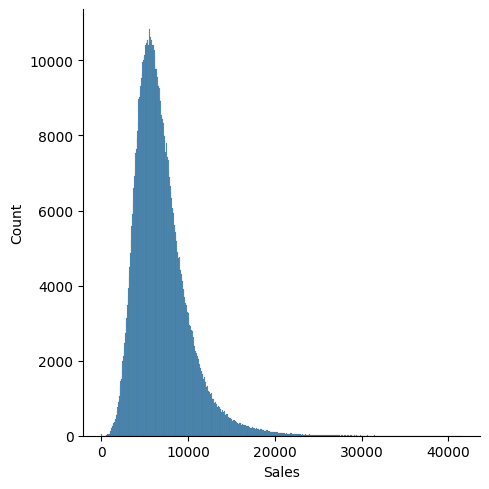

In [ ]:
sns.displot(x=df2.Sales)

In [ ]:
## transformation

df2['Sales'] = np.sqrt(df2['Sales'])

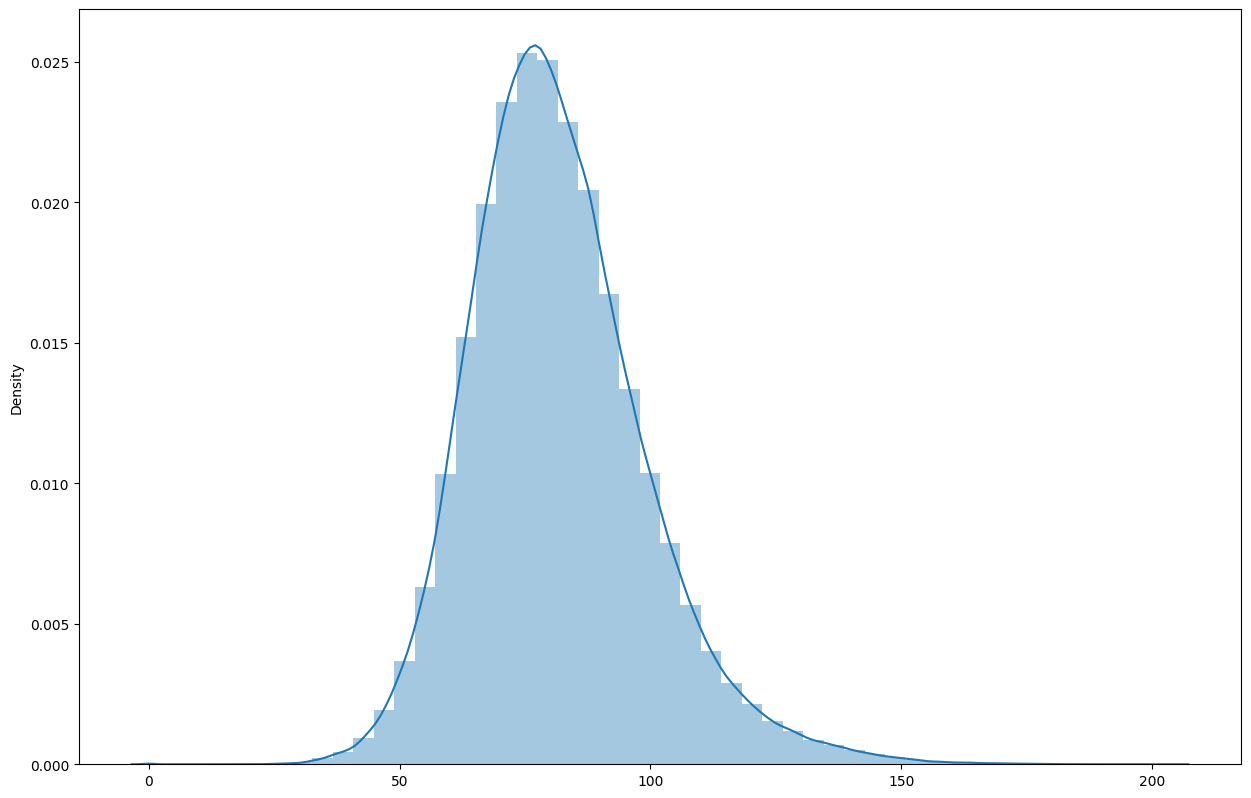

In [ ]:
plt.figure(figsize=(15,10))

sns.distplot(x=df2['Sales'])

In [ ]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
1017202,1115,1,2013-01-07,83.096330,471,1,1,0,1,5350.0,...,2,7,0,0,0,1,0,1,7.397260,0.0
1017204,1115,6,2013-01-05,69.072426,339,1,0,0,1,5350.0,...,1,5,0,0,0,1,0,1,7.167123,0.0
1017205,1115,5,2013-01-04,67.379522,326,1,0,0,1,5350.0,...,1,4,0,0,0,1,0,1,7.167123,0.0
1017206,1115,4,2013-01-03,65.551506,300,1,0,0,1,5350.0,...,1,3,0,0,0,1,0,1,7.167123,0.0
1017207,1115,3,2013-01-02,60.802960,305,1,0,0,1,5350.0,...,1,2,0,0,0,1,0,1,7.167123,0.0


In [ ]:
df2.Sales.min()

0.0

In [ ]:
df2[df2['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
22589,25,4,2014-02-13,0.0,0,1,0,0,0,430.0,...,7,44,0,0,1,0,0,0,24169.610959,130.0
22590,25,3,2014-02-12,0.0,0,1,0,0,0,430.0,...,7,43,0,0,1,0,0,0,24169.610959,130.0
25212,28,4,2014-09-04,0.0,0,1,1,0,0,1200.0,...,36,247,1,0,0,0,0,0,0.000000,0.0
25213,28,3,2014-09-03,0.0,0,1,1,0,1,1200.0,...,36,246,1,0,0,0,0,0,0.000000,0.0
25214,28,2,2014-09-02,0.0,0,1,1,0,1,1200.0,...,36,245,1,0,0,0,0,0,0.000000,0.0
51491,57,2,2014-07-01,0.0,0,1,1,0,0,420.0,...,27,182,0,0,0,1,0,1,24174.213699,1.0
92570,102,4,2014-07-24,0.0,0,1,0,0,1,150.0,...,30,205,0,0,0,0,0,0,4.602740,79.0
92582,102,6,2014-07-12,0.0,0,1,0,0,0,150.0,...,28,193,0,0,0,0,0,0,4.142466,79.0
205303,227,4,2014-09-11,0.0,0,1,0,0,0,2370.0,...,37,254,0,0,0,0,0,0,24176.515069,12.0
210424,232,4,2013-01-24,0.0,0,1,1,0,0,13570.0,...,4,24,0,0,1,0,0,1,0.000000,32.0


In [ ]:
# Select your features wisely to avoid overfitting




In [ ]:
columns_to_drop = ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date'] 
new_df = df2.drop(columns = columns_to_drop, axis =1)


In [ ]:
new_df.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
0,5,72.546537,555,1,1,0,1,1270.0,0,7,0,0,1,0,0,0,24187.134247,82.0
1,4,70.851958,546,1,1,0,1,1270.0,0,7,0,0,1,0,0,0,24187.134247,82.0
2,3,69.152006,523,1,1,0,1,1270.0,0,7,0,0,1,0,0,0,24187.134247,82.0
3,2,70.788417,560,1,1,0,1,1270.0,0,7,0,0,1,0,0,0,24187.134247,82.0
4,1,78.115299,612,1,1,0,1,1270.0,0,7,0,0,1,0,0,0,24187.134247,82.0


In [ ]:
new_df.shape

(844392, 18)

In [ ]:
new_df.Sales.min()

0.0

In [ ]:
new_df.Sales.max()

203.84062401788316

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'Promo2running', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

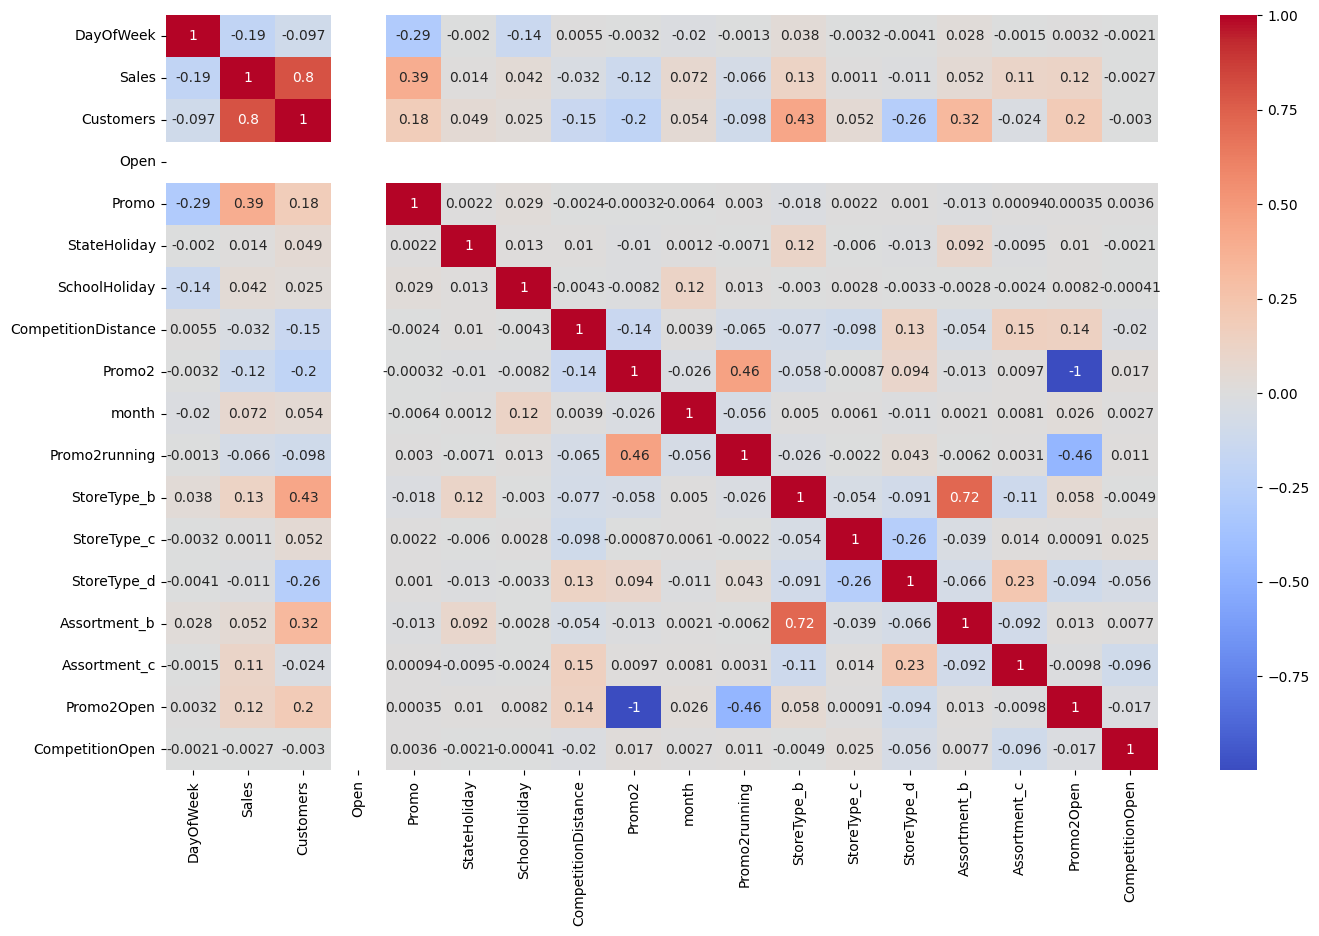

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), cmap="coolwarm", annot=True)

##### What all feature selection methods have you used  and why?

Here, we removed four columns (i.e ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date']) from our dataset which is irrelavant for our models. Because we will not give these input variables to ML model for sales prediction.

We converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running. We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.

We are combined 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running. We did the same thing as we did above. After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

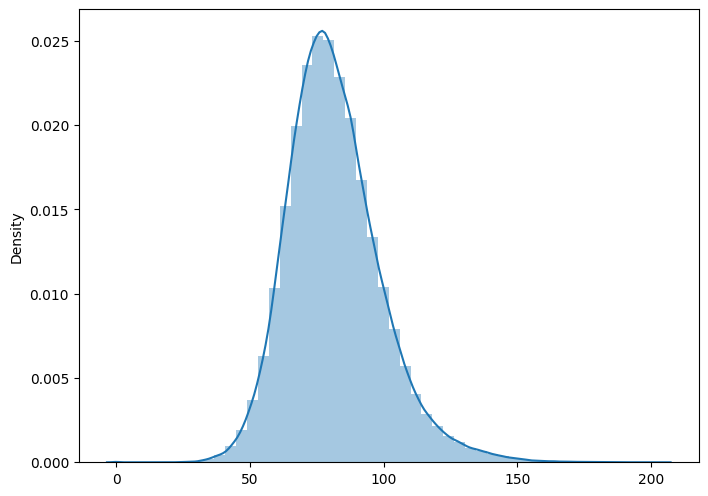

In [ ]:
# Transform Your data

sns.distplot(x=new_df['Sales'])

In [ ]:
#CompetitionDistance, month, Promo2Open,CompetitionOpen
new_df['CompetitionDistance'] = new_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['Promo2Open'] = new_df['Promo2Open'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:
new_df.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
0,5,72.546537,555,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
1,4,70.851958,546,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
2,3,69.152006,523,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
3,2,70.788417,560,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
4,1,78.115299,612,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719


In [ ]:
# new_df[new_df['Promo2Open']<0 ]
# new_df[new_df['CompetitionOpen']<0 ]
new_df[new_df['CompetitionDistance']<0 ]

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen


In [ ]:
new_df=new_df[new_df['Promo2Open']>0]
new_df

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen
0,5,72.546537,555,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
1,4,70.851958,546,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
2,3,69.152006,523,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
3,2,70.788417,560,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
4,1,78.115299,612,1,1,0,1,7.146772,0,7,0,0,1,0,0,0,10.093576,4.406719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1,83.096330,471,1,1,0,1,8.584852,1,1,0,0,0,1,0,1,2.001110,0.000000
1017204,6,69.072426,339,1,0,0,1,8.584852,1,1,0,0,0,1,0,1,1.969504,0.000000
1017205,5,67.379522,326,1,0,0,1,8.584852,1,1,0,0,0,1,0,1,1.969504,0.000000
1017206,4,65.551506,300,1,0,0,1,8.584852,1,1,0,0,0,1,0,1,1.969504,0.000000


In [ ]:
new_df.shape

(781597, 18)

In [ ]:
new_df.Sales.min()

0.0

In [ ]:
new_df.Sales.max()

203.84062401788316

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'Promo2running', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
new_df[new_df['CompetitionOpen']<0]

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen


In [ ]:
new_df[new_df['Promo2Open']<0]

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,Promo2running,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo2Open,CompetitionOpen


In [ ]:
# new_df = new_df[new_df.Open != 0]
# new_df.drop('Open', axis=1, inplace=True)

### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
independent_variables = list(set(new_df.columns.tolist()) - {'Sales'})

In [ ]:
independent_variables

['month',
 'Assortment_c',
 'StoreType_d',
 'StoreType_b',
 'SchoolHoliday',
 'Promo2running',
 'Promo',
 'Customers',
 'CompetitionOpen',
 'DayOfWeek',
 'StoreType_c',
 'CompetitionDistance',
 'Assortment_b',
 'StateHoliday',
 'Promo2Open',
 'Promo2',
 'Open']

In [ ]:
X=new_df[independent_variables]
y=new_df['Sales']

In [ ]:
# Splitting the dataset into the Training set and Test set
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



##### Which method have you used to scale you data and why?

We used minmax scaler to scale our data because all values will fall between 0 and 1. while the range is increased while using the standard scaler because it falls between the min and max values.
Our data does not follow normal distribution so, we used minmax scaler instead of standard scaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

Here, we select 80% of the data as a training data and 20% are the test data. Our dataset contains lots of observations so, we used 20% of the data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'Promo2running', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Sales', 'Date', 'Store', 'Customers']]])


,variables,VIF
0,DayOfWeek,1.113788
1,Open,372.091316
2,Promo,1.092248
3,StateHoliday,1.014153
4,SchoolHoliday,1.034476
5,CompetitionDistance,1.129550
6,Promo2,41.570422
7,month,1.016527
8,Promo2running,1.287612
9,StoreType_b,2.147991


## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


In [ ]:
regression_model.score(X_test, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We have used Linear Regression as our first model, Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(LinearRegression(), X, y,cv=i)
  print(np.average(score))


In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

clf = LinearRegression()

param_distributions = {"fit_intercept": [True, False],
                        "copy_X": [True, False],
                       "positive": [True, False]}
search = RandomizedSearchCV(clf, param_distributions).fit(X, y)
search.best_score_ 

##### Which hyperparameter optimization technique have you used and why?

Over here we have used **RandomizedSearchCV** hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning. 

###ML Model - 2 Decision Tree Regressor


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

In [ ]:
decision_tree_model.score(X_test, y_test)

Over here we have used Decision tree regressor, Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(DecisionTreeRegressor(), X, y,cv=i)
  print(np.average(score))

In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

clf = DecisionTreeRegressor()

param_distributions = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                        "splitter": ["best", "random"],
                       "max_features": ["auto", "sqrt", "log2"], "max_depth" : [10]}
search = RandomizedSearchCV(clf, param_distributions).fit(X, y)
search.best_score_ 

##### Which hyperparameter optimization technique have you used and why?

Over here we have used RandomizedSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

###ML Model - 3 Random Forest Regressor

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

In [ ]:
random_forest_model.score(X_test, y_test)

A supervised learning technique called Random Forest Regression leverages the ensemble learning approach for regression. The ensemble learning method combines predictions from various machine learning algorithms to provide predictions that are more accurate than those from a single model.

####2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(RandomForestRegressor(), X, y,cv=i)
  print(np.average(score))

In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

clf = RandomForestRegressor()

param_distributions = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                        "splitter": ["best", "random"],
                       "max_features": ["auto", "sqrt", "log2"], "max_depth" : [10]}
search = RandomizedSearchCV(clf, param_distributions).fit(X, y)
search.best_score_ 

####Which hyperparameter optimization technique have you used and why?

Over here we have used RandomizedSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning.

### ML Model - 4 Lasso and Ridge Regression (L1 and L2 Regularization)

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

In [ ]:
lasso_model.score(X_test, y_test)

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
elasticnet_model.score(X_test, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(random_forest_model,file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open('model_pickle','rb') as file:
    model = pickle.load(file)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

As we have seen above that, Random Forest Regressor is performing the best with the accuracy of 95.7% followed by Decison Tree Regressor with accuracy of 92.2%


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***